<a href="https://colab.research.google.com/github/Joanmei/Engage-Project/blob/main/G1Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Data Exploration

a) Categorize the variables in the dataset, as either numerical or categorical.
 First, I will load the dataset and analyze the data to determine appropriate classification of each variable.

In [3]:
# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/Final_Engage_Project/Insurance.xlsx")
data.head()

,age,sex,bmi,children,smoker,Region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
# Identify the types of variables
print("\nData types of each column:")
print(data.dtypes) # Changed 'insurance_data' to 'data


Data types of each column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
Region       object
expenses    float64
dtype: object


b) Based on the initial inspection of the dataset, here are the variables classified as numerical or categorical:Based on the initial inspection of the dataset, here are the variables classified as numerical or categorical:

 Numerical Variables:

 age: Stands for the number of years in case of an insured person.
 bmi: The Body Mass Index that is a measure of the amount of body fat with reference to the height and weight of a person.
 children: The total number of children/dependents that are catered for by the insurance.
 expenses: The cost of medical treatment which has been adopted by the individual (dependent variable).

 Categorical Variables:

 sex: Sex of the proposed insuring individual; male or female.
 smoker: Smoking status – this variable indicates whether or not the patient is a smoker by answering ‘yes’ or ‘no’ to the question.
 region: Geographic area (northeast area, northwest area, southeast area, southwest area).

In [6]:
# b) Encoding Categorical Variables
# Label encoding for 'sex' and 'smoker'
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
#label_encoder = LabelEncoder()
data["sex"]=pd.get_dummies(data['sex'], dtype=int,drop_first=True)
data["smoker"]=pd.get_dummies(data["smoker"], dtype=int,drop_first=True)
data["Region"] = pd.factorize(data["Region"])[0]
#data['sex'] = label_encoder.fit_transform(data['sex'])
#data['smoker'] = label_encoder.fit_transform(data['smoker'])
#data['Region'] = label_encoder.fit_transform(data['Region'])

In [7]:
data.head(10)

,age,sex,bmi,children,smoker,Region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
5,31,0,25.7,0,0,1,3756.62
6,46,0,33.4,1,0,1,8240.59
7,37,0,27.7,3,0,2,7281.51
8,37,1,29.8,2,0,3,6406.41
9,60,0,25.8,0,0,2,28923.14


In [8]:
data["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [9]:
data["Region"].unique()

array([0, 1, 2, 3])

In [10]:
# One-hot encoding for 'region'
#data = pd.get_dummies(data, columns=['Region'], drop_first=True)

In [11]:
# Display the DataFrame after encoding
print("\nDataFrame after encoding categorical variables:")
print(data.head(10))


DataFrame after encoding categorical variables:
   age  sex   bmi  children  smoker  Region  expenses
0   19    0  27.9         0       1       0  16884.92
1   18    1  33.8         1       0       1   1725.55
2   28    1  33.0         3       0       1   4449.46
3   33    1  22.7         0       0       2  21984.47
4   32    1  28.9         0       0       2   3866.86
5   31    0  25.7         0       0       1   3756.62
6   46    0  33.4         1       0       1   8240.59
7   37    0  27.7         3       0       2   7281.51
8   37    1  29.8         2       0       3   6406.41
9   60    0  25.8         0       0       2  28923.14


2. Visualization

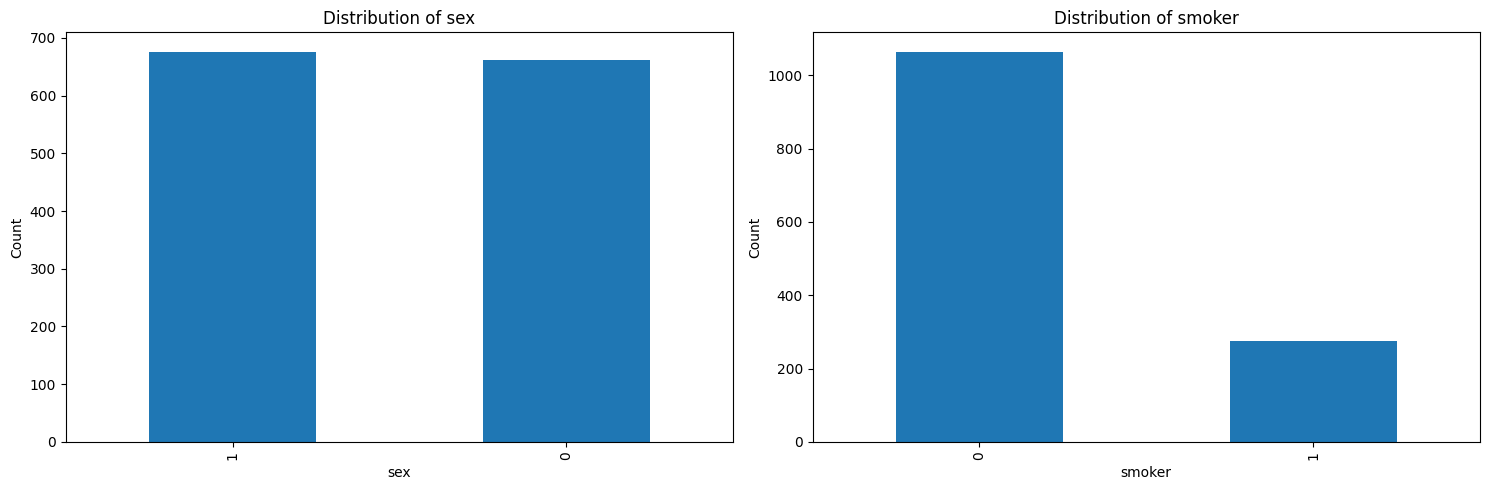

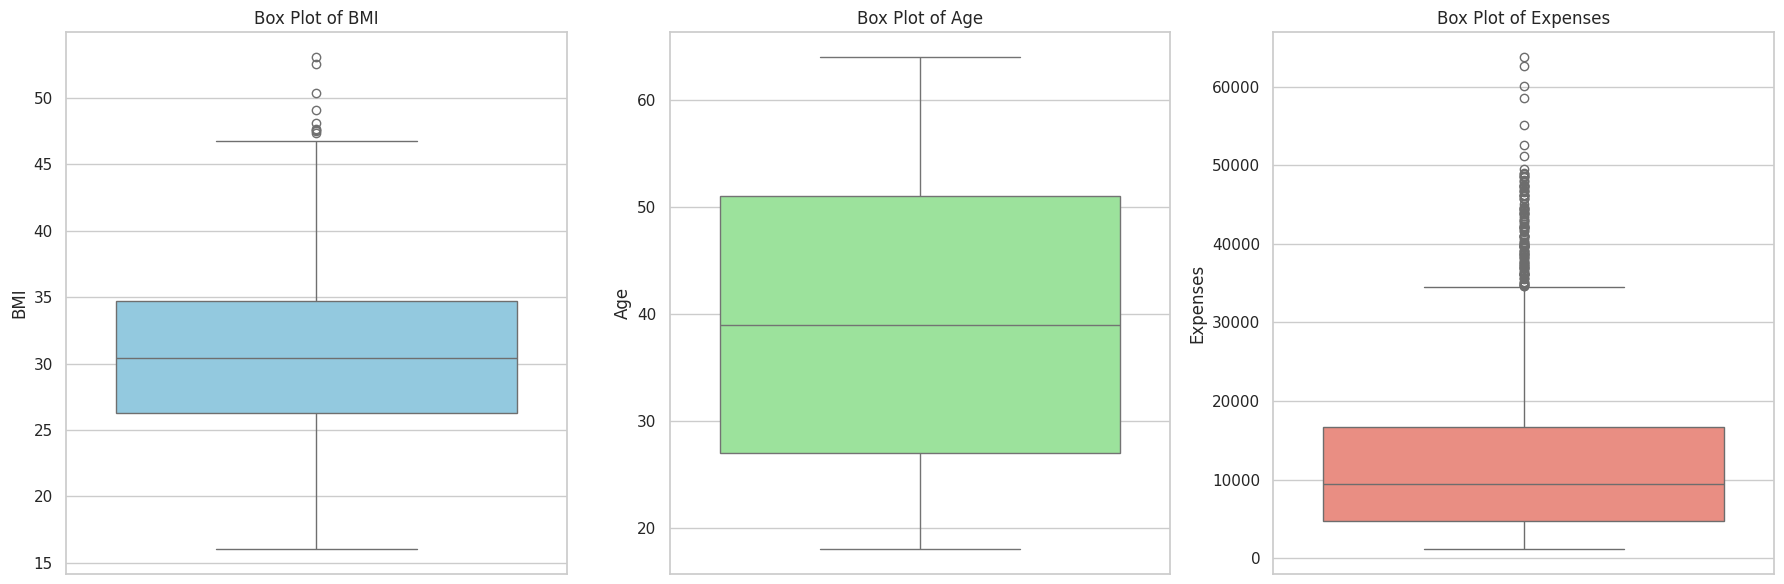

In [12]:
# Plot bar charts for the categorical variables
categorical_columns = ['sex', 'smoker']  # Removed 'Region' as it no longer exists.

# Set up the figure for subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

# Generate bar charts for each categorical variable
for i, column in enumerate(categorical_columns):
    data[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()



# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create box plots for numerical variables
plt.figure(figsize=(18, 6))

# Box plot for 'bmi'
plt.subplot(1, 3, 1)
sns.boxplot(y='bmi', data=data, color='skyblue')
plt.title('Box Plot of BMI')
plt.ylabel('BMI')

# Box plot for 'age'
plt.subplot(1, 3, 2)
sns.boxplot(y='age', data=data, color='lightgreen')
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Box plot for 'expenses'
plt.subplot(1, 3, 3)
sns.boxplot(y='expenses', data=data, color='salmon')
plt.title('Box Plot of Expenses')
plt.ylabel('Expenses')

plt.tight_layout()
plt.show()

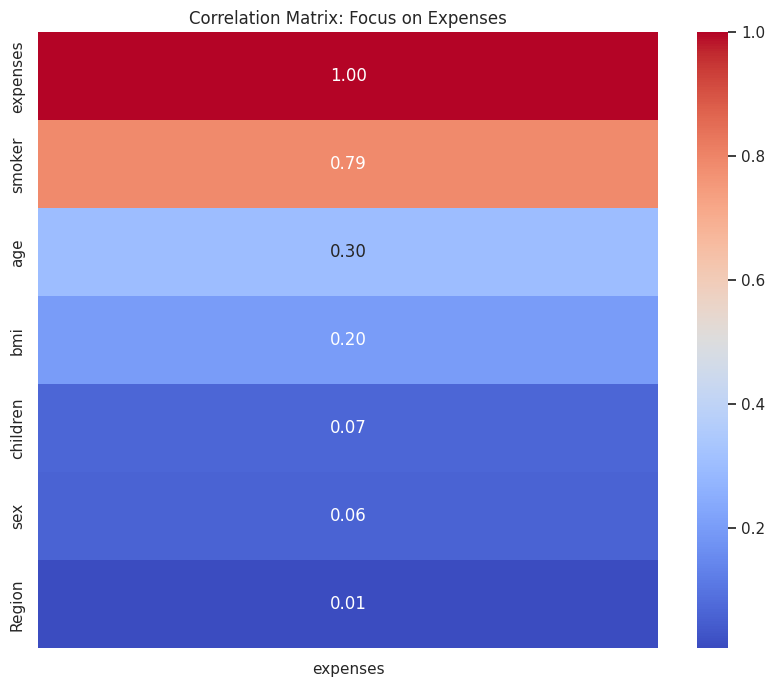

In [13]:
# b. Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap with a focus on 'expenses'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['expenses']].sort_values(by='expenses', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Focus on Expenses')
plt.show()

3. Data Cleaning

In [14]:
#a) Check for missing or inconsistent data entries

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)

# Check for any inconsistent data (e.g., outliers or unusual values)
# For this dataset, let's just take a quick look at descriptive statistics
print("\nDescriptive statistics of the dataset:\n", data.describe())

# If there are missing values, decide on a strategy
# Example strategy: Impute with the mean or mode, or drop rows if missing values are minimal
# In this case, let's proceed by dropping rows with missing values (if any)
data_cleaned = data.dropna()

Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
Region      0
expenses    0
dtype: int64

Descriptive statistics of the dataset:
                age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.665471     1.094918     0.204783   
std      14.049960     0.500160     6.098382     1.205493     0.403694   
min      18.000000     0.000000    16.000000     0.000000     0.000000   
25%      27.000000     0.000000    26.300000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.100000     5.000000     1.000000   

            Region      expenses  
count  1338.000000   1338.000000  
mean      1.484305  13270.422414  
std       1.104885  12110.011240  
min      

In [15]:
# Label Encoding using factorize for 'sex' and 'smoker'
data['sex'], sex_labels = pd.factorize(data['sex'])
data['smoker'], smoker_labels = pd.factorize(data['smoker'])
#data['Region'], Region_labels = pd.factorize(data['Region']) [0]

# Display the first few rows of the factorized dataset
print("\nDataset after applying factorize (Label Encoding):\n", data.head())

# Save the factorized dataset (optional)
# df.to_csv('/mnt/data/Factorized_Insurance.csv', index=False)


Dataset after applying factorize (Label Encoding):
    age  sex   bmi  children  smoker  Region  expenses
0   19    0  27.9         0       0       0  16884.92
1   18    1  33.8         1       1       1   1725.55
2   28    1  33.0         3       1       1   4449.46
3   33    1  22.7         0       1       2  21984.47
4   32    1  28.9         0       1       2   3866.86


Statistical Analysis:
4. Descriptive Statistics:


In [16]:
#a
from scipy import stats
# Calculate descriptive statistics for numerical variables
descriptive_stats = data.describe()

# Mean, median, mode, variance, and standard deviation
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]
variance_values = data.var()
std_dev_values = data.std()

# Display results
print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)
print("Variance Values:\n", variance_values)
print("Standard Deviation Values:\n", std_dev_values)

# Insights on distribution
print("\nDescriptive Statistics Summary:\n", descriptive_stats)


Mean Values:
 age            39.207025
sex             0.505232
bmi            30.665471
children        1.094918
smoker          0.795217
Region          1.484305
expenses    13270.422414
dtype: float64
Median Values:
 age           39.00
sex            1.00
bmi           30.40
children       1.00
smoker         1.00
Region         1.00
expenses    9382.03
dtype: float64
Mode Values:
 age           18.00
sex            1.00
bmi           27.60
children       0.00
smoker         1.00
Region         1.00
expenses    1639.56
Name: 0, dtype: float64
Variance Values:
 age         1.974014e+02
sex         2.501596e-01
bmi         3.719027e+01
children    1.453213e+00
smoker      1.629689e-01
Region      1.220771e+00
expenses    1.466524e+08
dtype: float64
Standard Deviation Values:
 age            14.049960
sex             0.500160
bmi             6.098382
children        1.205493
smoker          0.403694
Region          1.104885
expenses    12110.011240
dtype: float64

Descriptive Statisti

In [17]:
#b Calculate correlation matrix
correlation_matrix = data.corr()

# Display correlation between 'expenses' and other variables
correlation_expenses = correlation_matrix['expenses']
print("\nCorrelation of 'expenses' with other variables:\n", correlation_expenses)

# Calculate p-values for the correlations
from scipy.stats import pearsonr

def calculate_p_value(x, y):
    _, p_value = pearsonr(x, y)
    return p_value

p_values = {col: calculate_p_value(data['expenses'], data[col]) for col in data.columns if col != 'expenses'}
print("\nP-values for correlations:\n", p_values)



Correlation of 'expenses' with other variables:
 age         0.299008
sex         0.057292
bmi         0.198576
children    0.067998
smoker     -0.787251
Region      0.006208
expenses    1.000000
Name: expenses, dtype: float64

P-values for correlations:
 {'age': 4.886695589990823e-29, 'sex': 0.03613269566075167, 'bmi': 2.3018280735119614e-13, 'children': 0.01285212433601748, 'smoker': 8.271449574493481e-283, 'Region': 0.8205181892197634}


In [18]:
#5 Define the dependent variable (expenses) and independent variables
X = data.drop(columns=['expenses'])
y = data['expenses']

# Import statsmodels
import statsmodels.api as sm

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:43:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.094e+04   1064.107     10.282      0.0

Machine Learning Model Development:
6. Model Building:


In [19]:
# Define features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Import necessary library
from sklearn.linear_model import LinearRegression

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 10881.580568340964
Coefficients: [ 2.57038298e+02 -1.87048097e+01  3.35939380e+02  4.25463175e+02
 -2.36469273e+04  2.71222476e+02]


In [23]:
# Predicting on the test set
y_pred = model.predict(X_test)

7. Model Evaluation:


In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
y_pred = model.predict(X_test)

In [26]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

R-squared: 0.7833214205203847
Mean Squared Error: 33639075.08997808
Mean Absolute Error: 4186.940106317013


In [27]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [28]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Baseline Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 2. Lasso Regression
lasso_model = Lasso(alpha=1.0)  # Adjust alpha if needed
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# 3. Evaluation
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

print("Linear Regression:")
evaluate_model(y_test, linear_pred)

print("\nLasso Regression:")
evaluate_model(y_test, lasso_pred)

Linear Regression:
R-squared: 0.7833
Mean Squared Error: 33639075.0900
Mean Absolute Error: 4186.9401

Lasso Regression:
R-squared: 0.7833
Mean Squared Error: 33643199.7486
Mean Absolute Error: 4187.6763


In [29]:
import joblib
joblib_file = "/content/drive/My Drive/Final_Engage_Project/insurance_Model3.joblib"
joblib.dump(model, joblib_file)

['/content/drive/My Drive/Final_Engage_Project/insurance_Model3.joblib']

In [30]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [31]:
# Importing the necessary libraries
import streamlit as st
import joblib
import numpy as np

# Loading your saved model. Be sure to change the path if needed
model = joblib.load("/content/drive/My Drive/Final_Engage_Project/insurance_Model3.joblib")


st.title('health expenses prediction App')
st.write("This app predicts health expenses based on demographic and health characteristics.")

# Input fields
age= st.number_input('age', min_value=18.0, max_value=100.0, value=18.0)
bmi= st.number_input('bmi', min_value=18.0, max_value=100.0, value=18.0)
# Binary features using selectbox
sex = st.selectbox('sex', options=[0, 1], index=0)
children= st.selectbox('children', options=[0, 1], index=0)
Region= st.selectbox("Region", options=[0, 1,2,3], index=0)



#sex_1 = st.number_input('Sex', min_value=0.0, max_value=1.0, value=0.1)
#area_1 = st.number_input('Area', min_value=0.0, max_value=1.0, value=0.1)
#wealth_1 = st.number_input('Wealth Index Quintile', min_value=0.0, max_value=1.0, value=0.1)
#feature1 = st.number_input('Feature 1', min_value=0.0, max_value=100.0, value=0.0)

if st.button('Predict'):
    # Prepare input features for prediction
    #input_features = np.array([age])--for single input or simple linear model
    input_features = np.array([[age,bmi,sex,Region,children]])  # Ensure this is a 2D array

    # Make prediction
    prediction = model.predict(input_features)

    # Display prediction
    st.write(f'Predicted weight: {prediction[0]:.2f}')

2024-08-28 09:43:39.791 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.519 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-28 09:43:40.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 09:43:40.548 Thread 'MainThread': mi

In [32]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [33]:
!streamlit run /content/deploy_model.py &>/deploy_model_logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://neat-ways-ask.loca.lt
